***Importing data***

Data was imported from [Nylearn](https://neurosynth.org/analyses/terms/musicians/). Anatomical data (structural FMRI data) and Functional data (uniformity test) for Musicians was downloaded. 

For the analysis you will need to use Nilearn, Nibabel and Matplotlib, which you can dowload directly into your conda environment. 

First thing you'll need to do is import *os* and `glob` to be able to find your files. 

I named my fMRI data files "file_anatomical_MRI" and my functional data "file_functional_MRI", and the used `glob.glob` to locate them in my computer based on them based on their file extensions: '*anatomical.nii.gz' and '*0.01.nii.gz'

To get the path to those files I created two other variables "find_anatomical_MRI", and "find_functional_MRI" respetively. To locate them I used the function `os.getcwd` 

I really like your detailed description of what and how you ae coding. The explanations are perceise and compact, as well as your code that is concise and easy to follow. 

In [ ]:
#Write code that locates your FMRI data automatically based on the file extensions and file names.
import os, glob

file_anatomical_MRI=glob.glob('*anatomical.nii.gz')
file_functional_MRI=glob.glob('*0.01.nii.gz')

find_anatomical_MRI=os.path.join(os.getcwd(), file_anatomical_MRI[0])
find_functional_MRI=os.path.join(os.getcwd(), file_functional_MRI[0])
print(find_anatomical_MRI, find_functional_MRI) 

#I feel like here you could have shorted the code, combining os and glob in one line of code, directly creating the path to the file: 
#find_anatomical_MRI = glob.glob(os.path.join(os.getcwd(), '*anatomical.nii.gz'))[0]
#find_functional_MRI = glob.glob(os.path.join(os.getcwd(), '*0.01.nii.gz'))[0]




/Users/bego/Desktop/Programming/Home_assingment/anatomical.nii.gz /Users/bego/Desktop/Programming/Home_assingment/musicians_uniformity-test_z_FDR_0.01.nii.gz


***Visualizing the data***

Once the files were located and I had automated the path in my computer, I imported `nilearn.plotting` and used the function `nilearn.plotting.plot_stat_map` to plot my functional data on top of my anatomical data

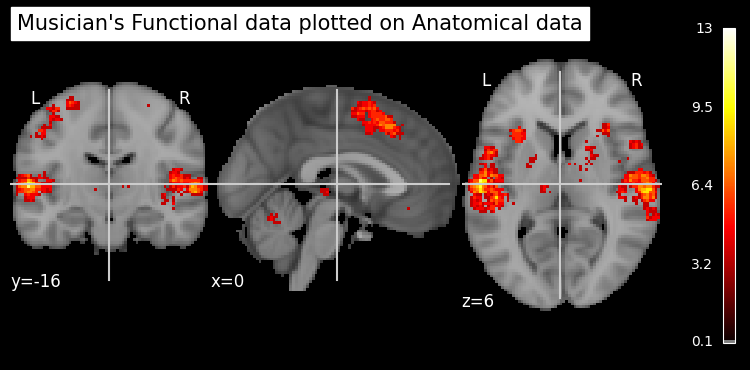

In [ ]:
#visualize your functional data on top of the anatomical scan using Nilearn.
import nilearn.plotting

nilearn.plotting.plot_stat_map(find_functional_MRI, bg_img=find_anatomical_MRI, threshold=0.1, display_mode='ortho', title="Musician's Functional data plotted on Anatomical data", cut_coords=(0, -16, 6), cmap='hot') 

#I think your code is perfect, and the title theorectially makes sense although i would have chosen something like "Brain Areas activated in Musicians" or "Musician's Brain Activation". 
#Also for the simplicity of reading the code you could have used indentations. 

***Plotting a histogram***

First I imported nibabel as nib and matplotlib.pyplot as plt

I used the `nibabel` library to load the functional MRI data file, which is stored in a NIfTI format.
Then I extracted the voxel activation values using the `.get_fdata()` method.

I selected only the positive values from the data, as these represent regions of activation in the brain. Negative or zero values were excluded. For this I used `data[data>0]`

Then I plotted the historgram using `plt.hist`, and named each axis. 

Greate description! 


Text(0, 0.5, 'Activation')

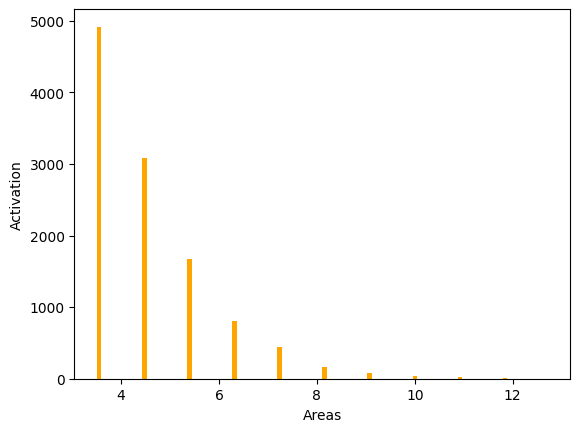

In [ ]:
#Plot a histogram of the values in the functional data file.
import nibabel as nib
import matplotlib.pyplot as plt

functional_data=nib.load(find_functional_MRI)
data=functional_data.get_fdata()

#select all positive values
positive_values=data[data>0]

#add axes labels
plt.hist(positive_values.flatten(), bins=100, color='orange')
plt.xlabel('Areas')
plt.ylabel('Activation')

# I assume that the information plotted in 2D refers to the level of activation per voxels in the brain areas. 
# The data is already z-scores from a one-way ANOVA testing whether the proportion of studies that report activation at a given voxel differs from the rate that would be expected if activations were uniformly distributed throughout gray matter.
# Thus, the plotted data is already the differential activation of the brain areas.

#I think it code is great, you could a title to the histogram. 

